In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('30_stocks_weekly_features.csv')
data

,Unnamed: 0,name,stock,start_time,end_time,days,成交量均值,成交金额均值,上周涨跌幅,涨跌幅均值,股价波动程度,开收盘价方差,未来一周的收益率
0,0,The AES Corporation,AES,2017-01-09 00:00:00.000000000,2017-01-15 23:59:59.999999999,5,-0.398383,-1.145283,0.226258,0.287462,-0.055444,-0.405057,-0.679557
1,1,The AES Corporation,AES,2017-01-16 00:00:00.000000000,2017-01-22 23:59:59.999999999,4,-0.520891,-1.189481,0.298712,-1.456626,0.383722,-0.418317,-0.106444
2,2,The AES Corporation,AES,2017-01-23 00:00:00.000000000,2017-01-29 23:59:59.999999999,5,1.457093,-0.358304,-1.237836,0.276422,-0.625553,-0.491673,0.092017
3,3,The AES Corporation,AES,2017-01-30 00:00:00.000000000,2017-02-05 23:59:59.999999999,5,-0.307792,-1.119155,0.287240,0.231663,-0.586995,-0.491420,0.386239
4,4,The AES Corporation,AES,2017-02-06 00:00:00.000000000,2017-02-12 23:59:59.999999999,5,-0.803225,-1.326657,0.240727,0.587547,-0.345918,-0.472615,-0.376327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,293,Southwest Airlines Company,LUV,2022-08-22 00:00:00.000000000,2022-08-28 23:59:59.999999999,5,-0.434759,-0.870276,-1.068083,0.023026,-0.405714,-0.463917,-0.400224
8936,294,Southwest Airlines Company,LUV,2022-08-29 00:00:00.000000000,2022-09-04 23:59:59.999999999,5,-0.562784,-1.041082,0.023898,-0.425020,-0.586651,-0.479894,0.856012
8937,295,Southwest Airlines Company,LUV,2022-09-05 00:00:00.000000000,2022-09-11 23:59:59.999999999,4,-0.345209,-0.764908,-0.451713,1.227379,-0.005882,-0.410905,-1.817783
8938,296,Southwest Airlines Company,LUV,2022-09-12 00:00:00.000000000,2022-09-18 23:59:59.999999999,5,0.064190,-0.324167,1.039057,-2.343049,1.620589,0.238612,-1.477891


In [3]:
#仅处理第一周的数据
data.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)
data = data[data['start_time']==data['start_time'][260]]
companies = data.iloc[0:,1:3].reset_index()
data=data.iloc[0:,6:]

In [4]:
#bartlett检验  p_value->0 才能主成分分析
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
 
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print('chi_square_value:',chi_square_value,'\n p_value:',p_value)

chi_square_value: 127.6832569939137 
 p_value: 2.733485147337267e-17


In [5]:
#主成分分析
from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
pca.fit(data)
k1_spss = pca.components_ / np.sqrt(pca.explained_variance_.reshape(pca.n_components_, 1))
print('贡献方差，即特征根:', pca.explained_variance_) # The amount of variance explained by each of the selected components.
print('方差贡献率:', pca.explained_variance_ratio_) # Percentage of variance explained by each of the selected components.
print('成分得分系数矩阵:', k1_spss)    #最后一列是每支股票得分

贡献方差，即特征根: [3.18956027 1.64770824 0.81060742 0.59189352]
方差贡献率: [0.4920698  0.25420039 0.12505656 0.09131444]
成分得分系数矩阵: [[ 0.10806143  0.20077045 -0.06608008 -0.19619884  0.18788087  0.41802953
  -0.09288879]
 [ 0.48636737  0.37004489  0.03803772  0.47418557 -0.02557391 -0.04927158
   0.06353419]
 [-0.38520099 -0.38437037  0.05159661  0.76273855  0.30797825  0.50784448
  -0.0182616 ]
 [ 0.21883072 -0.24740004 -0.21132822 -0.14926213  0.27400163  0.10119112
   1.19504983]]


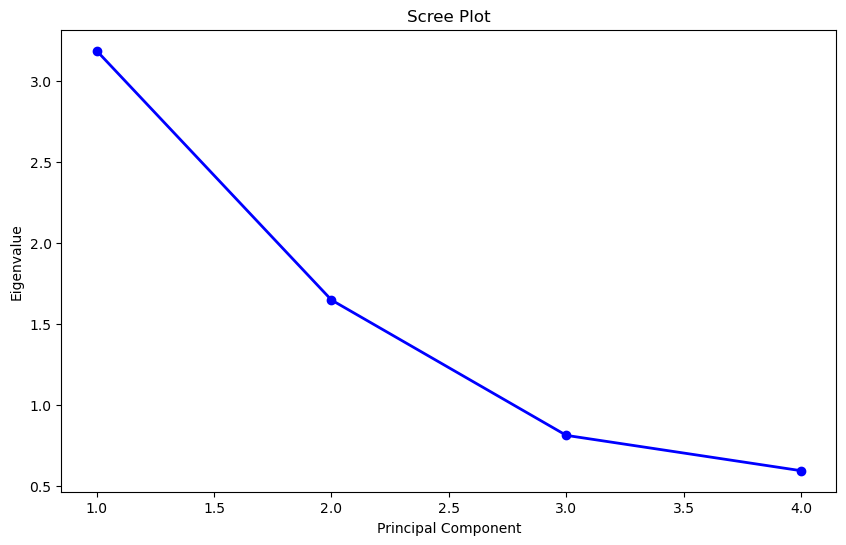

In [6]:
figure=plt.figure(figsize=(10,6))
sing_vals=np.arange(len(pca.explained_variance_)) + 1
plt.plot(sing_vals, pca.explained_variance_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue') 
plt.show() 

In [7]:
def score(pca,data):
    pca.components_ / np.sqrt(pca.explained_variance_.reshape(pca.n_components_, 1))
    X_score = pca.transform(data)
    #print('因子得分:', X_score)
    # 因子得分归一化，使其服从正态分布
    scaler2 = StandardScaler().fit(X_score)
    columns = []
    for i in range(X_score.shape[1]):
        columns.append('FAC'+str(i+1))
    X_score_scaler = pd.DataFrame(scaler2.transform(X_score), columns=columns)
    # 正负号转化
    k_sign = np.sign(k1_spss.sum(axis=1))
    # 取正负号
    X_score_scaler_sign = X_score_scaler
    # 综合得分
    rate = pca.explained_variance_ratio_
    X_score_scaler_sign['FAC_score'] = np.sum(X_score_scaler_sign * rate, axis=1)
    X_score_scaler_sign.sort_values(by=['FAC_score'], ascending=False, inplace=True)
    return X_score_scaler_sign
X_score_scaler_sign = score(pca,data)
print(X_score_scaler_sign)
#print(X_score_scaler_sign[X_score_scaler_sign["FAC_score"]>0])

        FAC1      FAC2      FAC3      FAC4  FAC_score
8   3.656424 -0.334935  0.120848  0.383144   1.764175
19  1.689517  2.663958 -0.739272 -0.467445   1.373404
12  0.499788  2.742920 -0.150368  0.186288   0.941388
27  2.261196 -1.448655  0.706958  0.046722   0.837094
3   0.333646  0.233693  3.890388  0.425497   0.748954
22 -0.051995  1.242058  0.797586 -0.306726   0.361881
13 -0.560056  0.995980  0.537621  0.464306   0.087223
9   0.378232  0.297186 -1.907372  0.649240   0.082417
5   0.645161 -0.640236  0.152694 -1.097341   0.073608
14 -0.491503  0.907169  0.812878 -0.328670   0.060393
11  0.447651 -1.083176 -0.369065  1.094687  -0.001262
0   0.399543 -1.026264 -0.154170  0.155852  -0.069322
25  0.315115 -1.155062 -0.428248  1.155753  -0.086577
21 -0.846774  0.765600  0.039310  0.775599  -0.146317
7   0.112645  0.273878 -1.608525 -1.179227  -0.183788
2  -0.825412 -0.121485 -0.707225  3.529232  -0.203215
29 -0.784976  0.649328 -0.058682 -0.065943  -0.234564
15 -0.598584  0.347141  0.11

# 第一个股票交易策略：
基于上述FAC_score得分排名，选取10支得分最高的股票，每支占比10%，每周一调仓一次。
### 优点：
简单好上手,quick start
### 缺点：
1. 只用了过去一周的数据来评分
2. 调仓时间固定
3. 持仓比例固定

# 改进1：增大观测周期
这里仅仅考虑多因子模型的观测周期，深度学习类似

In [8]:
# 取第k周数据，本周和前2周数据合成1周，取算数平均
k=3

#三周数据整合处理
data = pd.read_csv('test_2022.csv')
data.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)

data0 = data[data['start_time']==data['start_time'][k-3]]
data1 = data[data['start_time']==data['start_time'][k-2]]
data2 = data[data['start_time']==data['start_time'][k-1]]
data1.index = data0.index
data2.index = data0.index

companies = data1.iloc[0:,1:3]
companies = companies.reset_index().drop(columns = ['index'])
data = data0 + data1 + data2
data=data.iloc[0:,6:]
data = data/3
data = data.reset_index().drop(columns = ['index'])
data

,Average Volume,Average Turnover,Gain/Loss Last Week,Average Gain/Loss,Volatility,Price Variance,Yield Next week
0,-0.422912,0.560101,-0.323047,-0.367312,0.094411,0.226227,-0.063191
1,-0.570535,-0.001599,-0.357322,-0.635725,-0.250068,-0.213165,0.118840
2,2.550471,2.156640,1.071366,1.193764,0.863941,0.442005,0.506543
3,-0.765337,0.017014,0.847787,-0.275465,1.067863,3.050758,0.785839
4,-0.281939,0.677528,-0.208821,-0.639998,-0.147254,0.012066,-0.418005
5,-0.051847,0.849791,-0.547593,-0.840732,0.252802,0.618114,-0.380150
6,-0.989697,-0.824018,0.056730,-0.353444,-0.295693,0.282868,0.508760
7,0.860743,1.445743,-0.692679,-1.090326,0.351277,0.069306,-0.580886
8,1.037924,2.559933,-1.483092,-1.485351,0.931028,2.428667,0.056600
9,0.886366,1.635180,-0.474989,-0.965540,0.127194,0.999719,0.118982


In [9]:
#从三周数据获取得分
pca = PCA(n_components=6)
pca.fit(data)
X_score_scaler_sign = score(pca,data)
X_score_scaler_sign

,FAC1,FAC2,FAC3,FAC4,FAC5,FAC6,FAC_score
2,0.884197,3.358549,0.627348,-1.453559,1.344197,-1.992989,1.526258
19,2.196897,1.115709,0.847283,0.329621,-1.620397,2.649554,1.517840
8,2.816901,-0.289926,-0.708460,1.325769,-0.471197,-0.749895,1.123264
3,0.808094,-1.036583,3.975162,-0.520111,0.685388,-0.134421,0.665768
12,0.039357,1.642387,0.202125,0.339015,0.928615,0.515197,0.596698
9,1.116203,0.326949,-0.741222,0.888610,-0.424714,1.395977,0.539148
27,1.482320,-1.433749,-0.455580,1.231042,1.839565,-1.686137,0.209628
17,-0.298184,0.606076,0.363842,1.494740,-0.970133,-1.620223,0.103577
7,0.710385,0.241660,-1.987639,-0.731723,1.059500,0.176801,0.102839
22,-0.066305,-0.071929,0.959946,-0.134379,0.792632,-0.337823,0.102154


In [10]:
#Top 10
result = pd.concat([X_score_scaler_sign, companies], axis=1).reindex(X_score_scaler_sign.index)
result['stock'][:10]

2      LVS
19      GM
8     INTU
3     ZION
12     GPN
9      ADI
27    ANSS
17     NEM
7     PYPL
22     BXP
Name: stock, dtype: object

In [11]:
a = pd.DataFrame(result['stock'][:10], columns = ['stock']).T
b = a.set_axis(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], axis=1, inplace=False)
c = a.set_axis(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], axis=1, inplace=False)

b.append(c)

C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\3205750307.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  b.append(c)


,1,2,3,4,5,6,7,8,9,10
stock,LVS,GM,INTU,ZION,GPN,ADI,ANSS,NEM,PYPL,BXP
stock,LVS,GM,INTU,ZION,GPN,ADI,ANSS,NEM,PYPL,BXP


In [12]:
def week(k, data):
    #k = 3
    data0 = data[data['start_time']==data['start_time'][k-3]]
    data1 = data[data['start_time']==data['start_time'][k-2]]
    data2 = data[data['start_time']==data['start_time'][k-1]]
    data1.index = data0.index
    data2.index = data0.index
    data_composite = data0 + data1 + data2
    data_composite = data_composite.iloc[0:,6:]
    data_composite = data_composite/3
    data_composite = data_composite.reset_index().drop(columns = 'index')
    companies = data1.iloc[0:,1:3].reset_index().drop(columns = 'index')
    return data_composite, companies

data = pd.read_csv('30_stocks_weekly_features.csv')
data.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)
week_max = 38
df = None
for k in range(3, week_max):
    data_composite, companies = week(k, data)
    pca = PCA(n_components=6)
    pca.fit(data_composite)
    X_score_scaler_sign = score(pca,data_composite)
    result = pd.concat([X_score_scaler_sign, companies], axis=1).reindex(X_score_scaler_sign.index)
    a = pd.DataFrame(result['stock'][:10], columns = ['stock']).T
    b = a.set_axis(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], axis=1, inplace=False)
    if k == 3:
        df = b
    else:
        df = df.append(b)
df

C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\4241089134.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(b)
C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\4241089134.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(b)
C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\4241089134.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(b)
C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\4241089134.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(b)
C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\4241089134.py:30: FutureWarning: The frame.append method is deprecated and w

,1,2,3,4,5,6,7,8,9,10
stock,LUV,VTRS,ZION,JCI,HIG,MO,GM,KMX,DVA,ADI
stock,LUV,VTRS,HIG,ZION,MO,JCI,NEM,KMX,V,DVA
stock,MCHP,AKAM,JCI,LUV,VTRS,ZION,HIG,KMX,TSCO,K
stock,MCHP,AKAM,VTRS,JCI,TSCO,K,HIG,UHS,GM,ZION
stock,MCHP,AKAM,TJX,VTRS,K,DVA,UHS,JCI,TSCO,GM
stock,REG,VTRS,TJX,MCHP,UHS,DVA,BXP,TSCO,ZION,ANSS
stock,REG,VTRS,UHS,TJX,ZION,BXP,KMX,LUV,HIG,MCHP
stock,REG,VTRS,HIG,UHS,KMX,ZION,LUV,BXP,GM,NEM
stock,REG,VTRS,HIG,ZION,GM,KMX,MO,K,LUV,ADI
stock,REG,INTU,ZION,DRI,KMX,GM,HIG,UHS,VTRS,AKAM


In [13]:
df = df.reset_index().drop(columns = ['index'])
df.to_csv('10p each.csv')

# 改进2 ：调整持仓比例
上述的分数计算是一种根据方差的贡献率的粗略打分。但可以本质上我们只需要量化风险&收益：收益、风险因子

我们想通过更细致的操作来实现极致的收益——风险平衡点，在规定的风险范围内找到最大收益持仓比。本质上是一个线性规划的问题，这里我们采用一个比较原始的求解方法：遍历

In [14]:
#(根据约束条件求解最优权重，待补充)
def linear_solver(u_i, data):
    C = []
    bounds = []
    for j in range(stock_count):
        C.append((u_i - 1) * data['earn_ai'][j])
        bounds.append((0, None))
    C.append(u_i)
    bounds.append((None, None))

    A_ub = np.zeros((stock_count + 1,stock_count + 1))
    B_ub = np.zeros(stock_count + 1)
    B_ub[stock_count] = 1
    for k in range(stock_count):
        A_ub[k][k] = data['risk_ei'][k]
        A_ub[k][stock_count] = -1
    for k in range(stock_count):
        A_ub[stock_count][k] = 1
    resa = op.linprog(C, A_ub, B_ub, bounds=bounds)
    return resa

In [15]:
def combine(k, data):
    #k = 3
    data0 = data[data['start_time']==data['start_time'][k-3]]
    data1 = data[data['start_time']==data['start_time'][k-2]]
    data2 = data[data['start_time']==data['start_time'][k-1]]
    data1.index = data0.index
    data2.index = data0.index
    data_composite = data0 + data1 + data2
    data_composite = data_composite.iloc[0:,6:]
    data_composite = data_composite/3
    data_composite = data_composite.reset_index().drop(columns = 'index')
    data_composite['earn_ai'] =  (data_composite['Gain/Loss Last Week']+data_composite['Average Gain/Loss']+data_composite['Yield Next week'])/3
    data_composite['risk_ei'] =  (data_composite['Volatility']+data_composite['Price Variance'])/2
    return data_composite

In [16]:
from scipy import optimize as op
from collections import defaultdict
result = {}
week_cnt = 0
week_max = 38
stock_count = 30
u = [0.9, 0.5, 0.1]
for u_i in u:
    result[u_i] = []
#result['sp'] = []    

data = pd.read_csv('test_2022.csv')
data.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)


params = defaultdict(list)
for k in range(3, week_max + 1):
    data_composite = combine(k, data)
    
    for u_i in u:
        resa = linear_solver(u_i, data_composite)
        price = 0
        params[u_i].append(resa.x)
        for i in range(30):
            price +=  data_composite['Yield Next week'][i] * resa.x[i]
        result[u_i].append(price)
    #result['sp'].append(sp_composite['Average Gain/Loss'])

In [17]:
a = pd.DataFrame(params[0.9][1], columns = ['coefficients']).T
a.insert(0, 'u', 0.9)
a

,u,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
coefficients,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0


In [18]:
df1 = None
empty = True
for key in result:
    for i in range(len(result[key])):
        a = pd.DataFrame(params[key][i], columns = ['coefficients']).T
        a.insert(0, 'u', key)
        a.insert(1, 'week', i + 3)
        if empty:
            df1 = a
            empty = False
        else:
            df1 = df1.append(a)
df1

C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\92563446.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(a)
C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\92563446.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(a)
C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\92563446.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(a)
C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\92563446.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(a)
C:\Users\tsy\AppData\Local\Temp\ipykernel_38344\92563446.py:12: FutureWarning: The frame.append method is deprecated and wil

,u,week,0,1,2,3,4,5,6,7,...,21,22,23,24,25,26,27,28,29,30
coefficients,0.9,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000
coefficients,0.9,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000
coefficients,0.9,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000
coefficients,0.9,6,0.0,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.000000
coefficients,0.9,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
coefficients,0.1,34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355642
coefficients,0.1,35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.261329
coefficients,0.1,36,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.510823
coefficients,0.1,37,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.445479


In [19]:
df1.to_csv("params.csv")

# 改进3：调整持仓时间(当前数据的基础粒度是周，不太容易做)
相比于每周调整策略，我们希望自己的策略在时间粒度上能够更加灵活。如果不考虑手续费的影响，和改进2的区别在于：之前只需要关心截止下周收益率的变化情况，无论当前股票收益如何，下周重新调整股票到最有潜力的分布。可以再加上收益效率的考量，即用最少的天数赚最多的钱。